In [ ]:
# Use command below to install pyspark
# !pip install pyspark

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.master("local").appName("Market Analysis").getOrCreate()

In [3]:
spark

In [4]:
df_market=spark.read.option('header','true').csv("C:/Users/Sumit's Laptop/Desktop/CPSC 531/2019-Nov.csv",inferSchema=True)

In [34]:
df_market.count()

67501979

In [5]:
df_market.printSchema()

root
 |-- event_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [5]:
df_ml = df_market

In [7]:
df_market.dtypes

[('event_time', 'string'),
 ('event_type', 'string'),
 ('product_id', 'int'),
 ('category_id', 'bigint'),
 ('category_code', 'string'),
 ('brand', 'string'),
 ('price', 'double'),
 ('user_id', 'int'),
 ('user_session', 'string')]

In [26]:
df_market.show()

+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|  brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|2019-11-01 00:01:...|      view|   5701331|2053013553970938175|auto.accessories....|    ams| 221.37|566279704|efd58a11-6fbf-4aa...|
|2019-11-01 00:02:...|      view|  28715777|2053013565228450757|       apparel.shoes|nexpero|  75.42|518621750|6d7138cd-b28a-4f0...|
|2019-11-01 00:02:...|      view|   6500695|2053013554155487563|computers.compone...|   asus| 248.66|512370912|daf0bf99-adf1-487...|
|2019-11-01 00:05:...|      view|   5100378|2053013553341792533|  electronics.clocks| xiaomi|  70.53|521059488|dd9f62f4-b557-450...|
|2019-11-01 00:08:...|      view|   1005121|2053013555631882655|elect

In [6]:
df_market = df_market.dropDuplicates()

In [27]:
df_market.show()

+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|  brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|2019-11-01 00:01:...|      view|   5701331|2053013553970938175|auto.accessories....|    ams| 221.37|566279704|efd58a11-6fbf-4aa...|
|2019-11-01 00:02:...|      view|  28715777|2053013565228450757|       apparel.shoes|nexpero|  75.42|518621750|6d7138cd-b28a-4f0...|
|2019-11-01 00:02:...|      view|   6500695|2053013554155487563|computers.compone...|   asus| 248.66|512370912|daf0bf99-adf1-487...|
|2019-11-01 00:05:...|      view|   5100378|2053013553341792533|  electronics.clocks| xiaomi|  70.53|521059488|dd9f62f4-b557-450...|
|2019-11-01 00:08:...|      view|   1005121|2053013555631882655|elect

In [7]:
df_market = df_market.na.drop()

In [28]:
df_market.show()

+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|  brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|2019-11-01 00:01:...|      view|   5701331|2053013553970938175|auto.accessories....|    ams| 221.37|566279704|efd58a11-6fbf-4aa...|
|2019-11-01 00:02:...|      view|  28715777|2053013565228450757|       apparel.shoes|nexpero|  75.42|518621750|6d7138cd-b28a-4f0...|
|2019-11-01 00:02:...|      view|   6500695|2053013554155487563|computers.compone...|   asus| 248.66|512370912|daf0bf99-adf1-487...|
|2019-11-01 00:05:...|      view|   5100378|2053013553341792533|  electronics.clocks| xiaomi|  70.53|521059488|dd9f62f4-b557-450...|
|2019-11-01 00:08:...|      view|   1005121|2053013555631882655|elect

In [29]:
df_market.count()

42018766

In [21]:
# For finding day of week

from pyspark.sql.functions import dayofweek

In [55]:
df1 = df_market.withColumn('Week',dayofweek(df_market.event_time))

In [56]:
df1 = df1.groupBy('Week','event_type').count()

In [57]:
df1 = df1.orderBy(df1.Week.asc())

In [58]:
df1.show()

+----+----------+--------+
|Week|event_type|   count|
+----+----------+--------+
|   1|      cart|  586851|
|   1|  purchase|  253381|
|   1|      view|10655259|
|   2|      view| 7060674|
|   2|      cart|  251754|
|   2|  purchase|  105184|
|   3|      cart|  233132|
|   3|  purchase|   96793|
|   3|      view| 6758308|
|   4|      view| 6728150|
|   4|  purchase|   97257|
|   4|      cart|  235121|
|   5|      cart|  337040|
|   5|      view| 7768675|
|   5|  purchase|   96558|
|   6|  purchase|  104466|
|   6|      view|12138186|
|   6|      cart|  742195|
|   7|      cart|  642837|
|   7|      view|12446858|
+----+----------+--------+
only showing top 20 rows



In [ ]:
df1.head(30)

In [13]:
e_type = df_market.groupBy('event_type').count()

In [14]:
e_type.show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  659251|
|      view|39314217|
|      cart| 2045298|
+----------+--------+



In [15]:
type(e_type)

pyspark.sql.dataframe.DataFrame

In [16]:
e_type = e_type.toPandas()

In [17]:
e_type.head()

,event_type,count
0,purchase,659251
1,view,39314217
2,cart,2045298


In [18]:
#Import Graph
import matplotlib.pyplot as plt

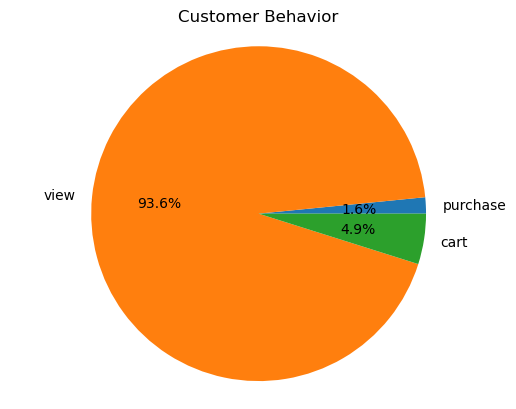

In [19]:
plt.pie(e_type['count'],labels=e_type['event_type'],autopct='%1.1f%%')
plt.title('Customer Behavior')
plt.axis('equal')
plt.show()

In [20]:
df1 = df1.toPandas()

In [21]:
df1.head(21)

,Week,event_type,count
0,1,cart,395078
1,1,purchase,183486
2,1,view,6601967
3,2,cart,161600
4,2,purchase,73543
5,2,view,4309741
6,3,purchase,68076
7,3,cart,152796
8,3,view,4106304
9,4,purchase,69027


In [22]:
only_purchases = df1.loc[df1.event_type == 'purchase'] 
only_cart = df1.loc[df1.event_type == 'cart']
only_view = df1.loc[df1.event_type == 'view']

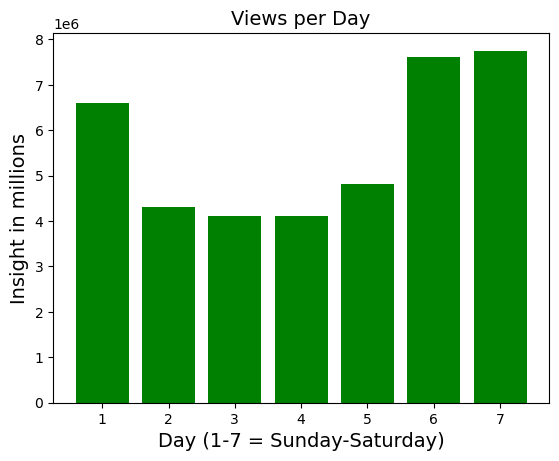

In [38]:
plt.bar(only_view['Week'],only_view['count'],color='green')
plt.title('Views per Day', fontsize=14)
plt.xlabel('Day (1-7 = Sunday-Saturday)', fontsize=14)
plt.ylabel('Insight in millions', fontsize=14)
plt.show()

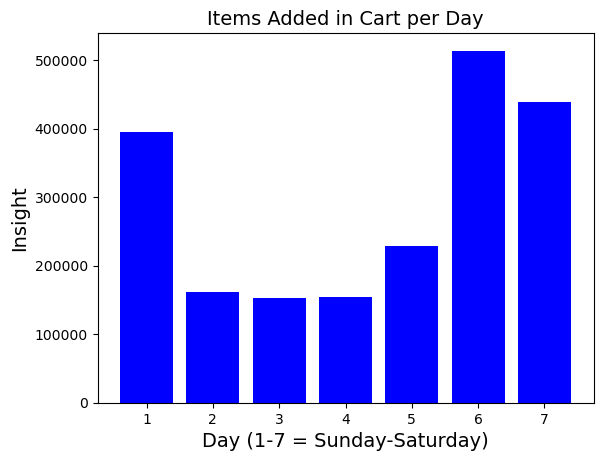

In [36]:
plt.bar(only_cart['Week'],only_cart['count'],color='blue')
plt.title('Items Added in Cart per Day', fontsize=14)
plt.xlabel('Day (1-7 = Sunday-Saturday)', fontsize=14)
plt.ylabel('Insight', fontsize=14)
plt.show()

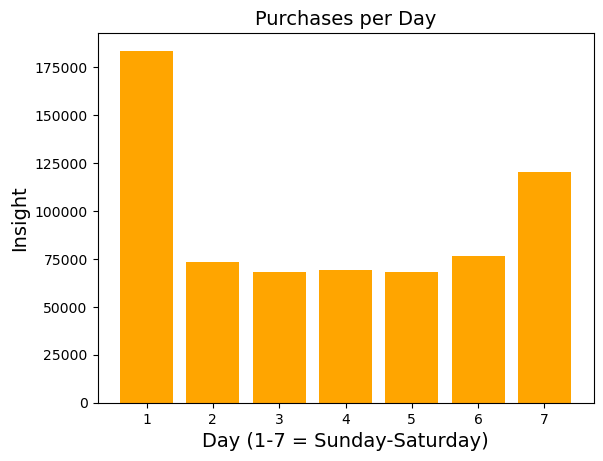

In [37]:
plt.bar(only_purchases['Week'],only_purchases['count'],color='orange')
plt.title('Purchases per Day', fontsize=14)
plt.xlabel('Day (1-7 = Sunday-Saturday)', fontsize=14)
plt.ylabel('Insight', fontsize=14)
plt.show()

# ML Part

In [6]:
from pyspark.sql.functions import when, col, split, dayofweek

In [7]:
df_ml.select("event_type").distinct().show()

+----------+
|event_type|
+----------+
|  purchase|
|      view|
|      cart|
+----------+



In [8]:
df_targets = df_ml[df_ml.event_type.isin("cart","purchase")].dropDuplicates(['event_type', 'product_id','price', 'user_id','user_session'])


In [9]:
df_targets = df_targets.withColumn('is_purchased', when(col("event_type") == 'purchase', '1').otherwise('0'))

In [51]:
df_targets.select("is_purchased").distinct().show()

+------------+
|is_purchased|
+------------+
|           0|
|           1|
+------------+



In [10]:
df_targets = df_targets.withColumn('event_weekday',dayofweek(df_targets.event_time))

In [121]:
df_targets.head()

Row(event_time='2019-11-20 08:09:09 UTC', event_type='cart', product_id=1004836, category_id=2053013555631882655, category_code='electronics.smartphone', brand='samsung', price=229.88, user_id=548035709, user_session='001e3221-1cba-48aa-aca9-20ab30c5a16a', is_purchased='0', event_weekday=4)

In [11]:
split_col = pyspark.sql.functions.split(df_targets['category_code'], '[\.]')
df_targets = df_targets.withColumn('category_code_level1', split_col.getItem(0))
df_targets = df_targets.withColumn('category_code_level2', split_col.getItem(1))

In [12]:
cart_purchase_users = df_targets[df_targets.event_type.isin(["cart","purchase"])]

In [13]:
cart_purchase_users_all_activity = df_targets[df_targets.user_id.isin(cart_purchase_users.user_id)]

In [ ]:
cart_purchase_users_all_activity.head()

In [14]:
activity_in_session = cart_purchase_users_all_activity.groupby("user_session","event_type").count()

In [15]:
activity_in_session = activity_in_session.withColumnRenamed("count", "activity_count")

In [16]:
activity_in_session = activity_in_session.drop("event_type")

In [19]:
activity_in_session.show()

+--------------------+--------------+
|        user_session|activity_count|
+--------------------+--------------+
|0613e789-9739-445...|             2|
|1097ce10-667f-47d...|             1|
|13536475-455b-4c2...|             1|
|1aa65d1c-45dd-417...|             1|
|205d7281-a60b-4bd...|             1|
|28375e61-c8f9-47b...|             2|
|2a11adcc-c608-49e...|             2|
|2b10b581-736c-4f9...|             1|
|2fdf1dae-cfa1-402...|             2|
|3a954d14-04b6-47c...|             1|
|4292ad01-e32d-439...|             1|
|49d4c036-ccb4-4fc...|             1|
|4b487dc3-0878-42e...|             1|
|4b9e3a7e-abb0-4f4...|             2|
|5181a987-3dd9-418...|             1|
|5202a9d9-41f1-41c...|             1|
|52c36061-34bf-477...|             1|
|56f7bbfe-22a6-4d4...|             1|
|5a93fd64-283a-4bb...|             1|
|6041e5c3-ca32-4a2...|             1|
+--------------------+--------------+
only showing top 20 rows



In [17]:
df_targets = df_targets.join(activity_in_session, on=['user_session'], how='left')

In [18]:
df_targets = df_targets.na.fill(value= 0, subset=['activity_count'])

In [22]:
df_targets.show()

+--------------------+--------------------+----------+----------+-------------------+--------------------+----------+-------+---------+------------+-------------+--------------------+--------------------+--------------+
|        user_session|          event_time|event_type|product_id|        category_id|       category_code|     brand|  price|  user_id|is_purchased|event_weekday|category_code_level1|category_code_level2|activity_count|
+--------------------+--------------------+----------+----------+-------------------+--------------------+----------+-------+---------+------------+-------------+--------------------+--------------------+--------------+
|000506dd-c8f9-46e...|2019-11-16 17:11:...|      cart|   2601552|2053013563970159485|                null|   gorenje| 486.24|515903856|           0|            7|                null|                null|             1|
|000664bc-748c-465...|2019-11-12 08:40:...|      cart|  12702930|2053013553559896355|                null|  cordiant|  3

In [19]:
df_targets.select("is_purchased").distinct().show()

+------------+
|is_purchased|
+------------+
|           0|
|           1|
+------------+



In [25]:
# Saving the dataset into csv
#df_targets = df_targets.toPandas()
# df_targets.to_csv(r"C:/Users/Sumit's Laptop/Desktop/CPSC 531/training_data.csv")

# Importing Libraries for ML model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

# Use following commands to install xgboost
#conda install -c conda-forge xgboost
#pip install xgboost

from sklearn.utils import resample
from sklearn import metrics
import pandas as pd

In [ ]:
final_target = pd.read_csv("C:/Users/Sumit's Laptop/Desktop/CPSC 531/training_data.csv")

In [ ]:
# final_target = final_target.dropna()

In [ ]:
final_target.head()

In [ ]:
is_purcahase_set = final_target[final_target['is_purchased']== 1]
is_purcahase_set.shape[0]

In [ ]:
not_purcahase_set = final_target[final_target['is_purchased']== 0]
not_purcahase_set.shape[0]

In [ ]:
n_samples = 500000
is_purchase_downsampled = resample(is_purcahase_set,
                                replace = False, 
                                n_samples = n_samples,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_set,
                                replace = False,
                                n_samples = n_samples,
                                random_state = 27)

In [ ]:
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

In [ ]:
features = downsampled.loc[:,['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]

# Encode categorical variables

In [ ]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

In [ ]:
print(list(features.columns))

# Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Train the model

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))